In [ ]:
# early vs late trials
# probe trails

In [1]:
import brainsss
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
import scipy
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from scipy.cluster import hierarchy
import matplotlib as mpl
from matplotlib.pyplot import cm
import random
from scipy.stats import sem
import time
import h5py
import ants
import nibabel as nib
import matplotlib
from scipy.ndimage import gaussian_filter1d
from scipy.fftpack import fft,fftshift,ifft
from scipy import signal
import pickle

/home/users/yandanw/.local/lib/python3.6/site-packages/ants/viz/render_surface_function.py:16: UserWarning:

Cant import Plotly. Install it `pip install chart_studio` if you want to use ants.render_surface_function



In [ ]:
# Best flies: 134,292,294,296
# 8 good flies: 116,122,134,154,292,294,296
# out of the 8 flies, there are 4 flies have 3 stimulus patterns(0-180,180-0,middle to lateral)
# and they are 154,292,294, and 296.
# all those flies are with GcAMP6f
# there are good flies with good behavior and neural imaging data but with GcAMP8s
# 153,152,149,143

In [26]:
fly=134
roi_signals = {}
func_path = f'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_{fly}/func_0/'
filename = os.path.join(func_path, 'STA', F'20220607_luke_STA_roi_signal_filtered_extended_fly_{fly}.pickle')
with open(filename, 'rb') as handle:
    roi_signal = pickle.load(handle)
roi_signals[fly] = roi_signal

In [27]:
roi_signals[134]['mean']['left']['ve_0'].shape

(39, 110)

In [19]:
file = os.path.join(func_path, 'STA')
os.listdir(file)

['sta_0.npy',
 'sta_180.png',
 'sta_0.png',
 '20220607_luke_STA_roi_signal_not_filtered.pickle',
 '20220524_luke_STA_roi_signal.pickle',
 '20220524_luke_STA_all_warps.pickle',
 'sta_180.npy',
 '20220607_luke_STA_roi_signal_filtered_extended.pickle',
 '20220607b_luke_STA_roi_signal.pickle',
 '20220607_luke_STA_roi_signal_filtered.pickle',
 '20220607_luke_STA_roi_signal.pickle']

In [36]:
# fly = 134 #'fly_153'#'fly_147'#'fly_152'#'fly_134'
# roi_signals = {}
# flies = [134,292,294,296]
# for fly in flies:
#     func_path = f'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_{fly}/func_0/'
#     filename = os.path.join(func_path, 'STA', '20220607_luke_STA_roi_signal_filtered_extended.pickle')
#     with open(filename, 'rb') as handle:
#         roi_signal = pickle.load(handle)
#     roi_signals[fly] = roi_signal
# bin_start = -5100; bin_end = 4000; bin_size = 100

In [28]:
centered_lines = [51,55,57]
all_lines = []
for shift in [-40,-20,0,20,40]:
    shifted_lines = [i+shift for i in centered_lines]
    all_lines += shifted_lines
all_lines

[11, 15, 17, 31, 35, 37, 51, 55, 57, 71, 75, 77, 91, 95, 97]

In [38]:
#roi_signals

In [29]:
roi_ids, names = brainsss.load_roi_hemi_ids()

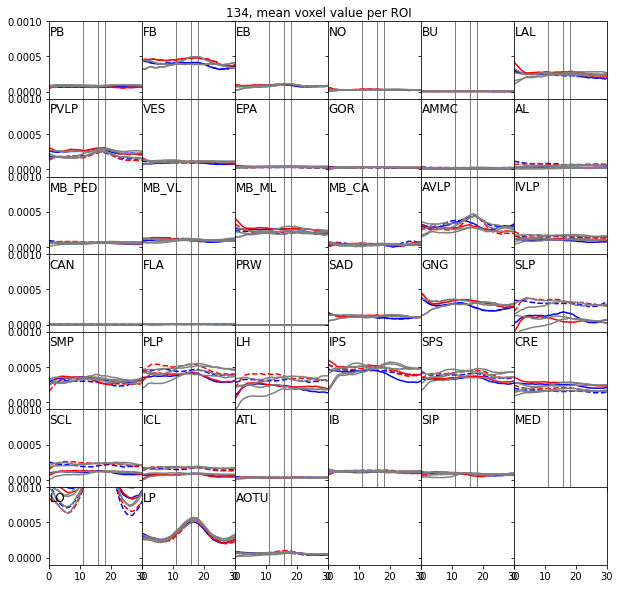

In [53]:
#full_left_group and STA_in_atlas_space_left should indeed both refer to the left brain

#right turn is blue, left turn is red
#solid line is left brain, dashed line is right brain

#so the general hypothesis is for solid lines the red should be higher, and for dashed line the blue should be higher
signal_type = 'mean'

#for max view we want x zoom in
if signal_type == 'max':
    roi_y_coor = .8
    roi_x_coor = 9
    vertical_lines = [11,16,18]
    x_start = 0#8
    x_end = 30#25
    y_start = 0
    y_end = 1
if signal_type == 'mean':
    roi_y_coor = 0.0008
    roi_x_coor = .2
    vertical_lines = [11,16,18]#[3,8,10]
    x_start = 0
    x_end = 30
    y_start = -0.0001
    y_end = 0.001

fig, ax = plt.subplots(7, 6, sharex='col', sharey='row', figsize=(10,10))
pltnum = 0
for i in range(7):
    for j in range(6):
        if pltnum == 39:
            break
        
        for line in vertical_lines:
            ax[i,j].axvline(line,linestyle='-',color='k',linewidth=.5)
        
        ax[i,j].plot(roi_signal[signal_type]['left']['ve_0'][pltnum,:],color='blue',linestyle='-')
        ax[i,j].plot(roi_signal[signal_type]['right']['ve_0'][pltnum,:],color='blue',linestyle='--')
        ax[i,j].plot(roi_signal[signal_type]['left']['ve_180'][pltnum,:],color='red',linestyle='-')
        ax[i,j].plot(roi_signal[signal_type]['right']['ve_180'][pltnum,:],color='red',linestyle='--')
        
        ax[i,j].plot(roi_signal[signal_type]['left']['ve_no_0'][pltnum,:],color='grey',linestyle='-')
        ax[i,j].plot(roi_signal[signal_type]['right']['ve_no_0'][pltnum,:],color='grey',linestyle='-')
        ax[i,j].plot(roi_signal[signal_type]['left']['ve_no_180'][pltnum,:],color='grey',linestyle='-')
        ax[i,j].plot(roi_signal[signal_type]['right']['ve_no_180'][pltnum,:],color='grey',linestyle='-')
        
        ax[i,j].text(roi_x_coor, roi_y_coor, names[pltnum],fontsize=12)
        ax[i,j].set_ylim(y_start,y_end)
        ax[i,j].set_xlim(x_start,x_end)
        
        pltnum += 1

plt.subplots_adjust(hspace=0,wspace=0)
plt.suptitle(f'{fly}, {signal_type} voxel value per ROI',y=.9)

save_path = '/oak/stanford/groups/trc/data/yandan/2P_Imaging/optomotor_response_analysis/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
plt.savefig(fname,dpi=300,bbox_inches='tight')


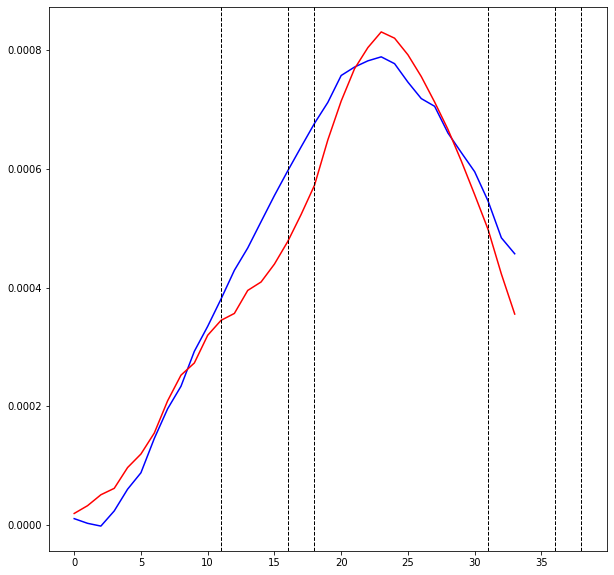

In [8]:
plt.figure(figsize=(10,10))
pltnum = np.where(np.asarray(names)=='IPS')[0][0]

move = roi_signal[signal_type]['left']['ve_0'][pltnum,:]
no_move = roi_signal[signal_type]['left']['ve_no_0'][pltnum,:]
plt.plot(move-no_move,color='blue',linestyle='-')

move = roi_signal[signal_type]['left']['ve_180'][pltnum,:]
no_move = roi_signal[signal_type]['left']['ve_no_180'][pltnum,:]
plt.plot(move-no_move,color='red',linestyle='-')

vertical_lines = [11,16,18,31,36,38]
for line in vertical_lines:
    plt.axvline(line,linestyle='--',color='k',linewidth=1)

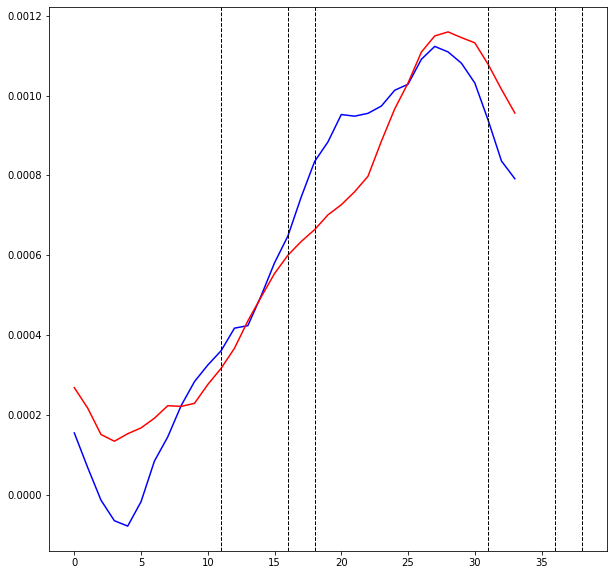

In [9]:
plt.figure(figsize=(10,10))
pltnum = np.where(np.asarray(names)=='LO')[0][0]
signal_type = 'mean'

move = roi_signal[signal_type]['left']['ve_0'][pltnum,:]
no_move = roi_signal[signal_type]['left']['ve_no_0'][pltnum,:]
plt.plot(move-no_move,color='blue',linestyle='-')

move = roi_signal[signal_type]['left']['ve_180'][pltnum,:]
no_move = roi_signal[signal_type]['left']['ve_no_180'][pltnum,:]
plt.plot(move-no_move,color='red',linestyle='-')

vertical_lines = [11,16,18,31,36,38]
for line in vertical_lines:
    plt.axvline(line,linestyle='--',color='k',linewidth=1)
# for line in all_lines:
#     plt.axvline(line,linestyle='--',color='k',linewidth=1)

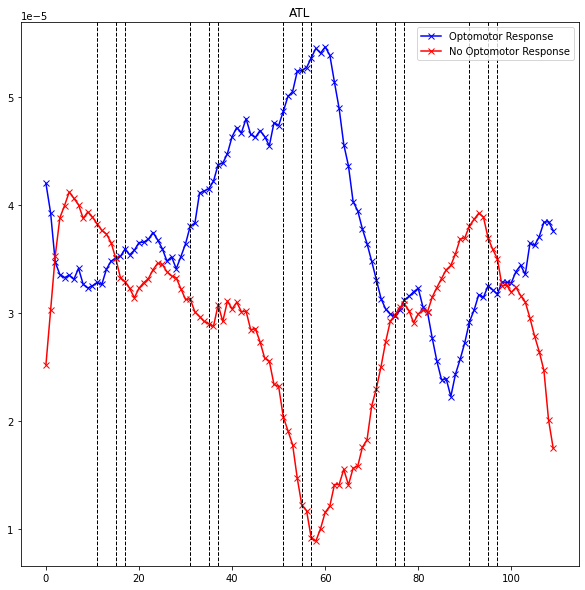

In [82]:
plt.figure(figsize=(10,10))
roi_name = 'ATL'
pltnum = np.where(np.asarray(names)==roi_name)[0][0]
signal_type = 'mean'

move = roi_signal[signal_type]['right']['ve_0'][pltnum,:]
plt.plot(move,color='blue',linestyle='-',marker='x',label='Optomotor Response')
no_move = roi_signal[signal_type]['right']['ve_no_0'][pltnum,:]
plt.plot(no_move,color='red',linestyle='-',marker='x',label='No Optomotor Response')
plt.legend()
plt.title(roi_name)
# move = roi_signal[signal_type]['right']['ve_0'][pltnum,:]
# plt.plot(move,color='blue',linestyle='--',marker='x')
# no_move = roi_signal[signal_type]['right']['ve_no_0'][pltnum,:]
# plt.plot(no_move,color='red',linestyle='--',marker='x')

# vertical_lines = [11,16,18,31,36,38]
# for line in vertical_lines:
#     plt.axvline(line,linestyle='--',color='k',linewidth=1)

for line in all_lines:
    plt.axvline(line,linestyle='--',color='k',linewidth=1)
# Save the figure
save_path = '/oak/stanford/groups/trc/data/yandan/2P_Imaging/optomotor_response_analysis/figs'
fname = os.path.join(save_path, f'{roi_name}_signal_{signal_type}_fly_{fly}_0.png')
plt.savefig(fname, dpi=300, bbox_inches='tight')

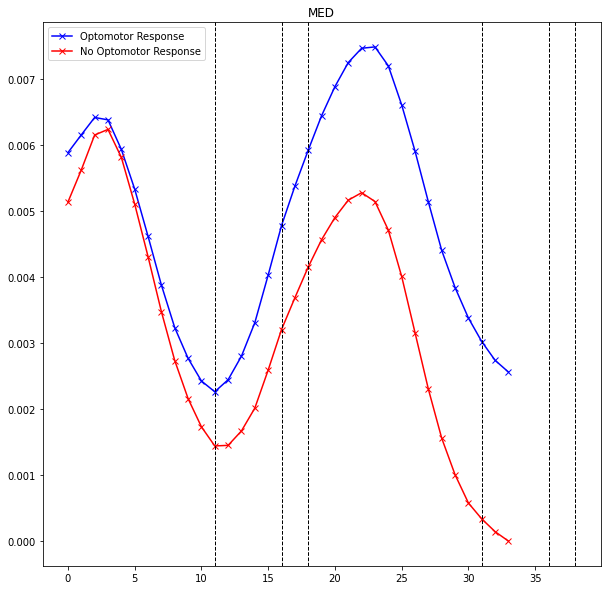

In [32]:
plt.figure(figsize=(10,10))
roi_name = 'MED'
pltnum = np.where(np.asarray(names)==roi_name)[0][0]
signal_type = 'mean'

#fly = 134
for fly in [134]:
    move = roi_signals[fly][signal_type]['right']['ve_0'][pltnum,:]
    plt.plot(move,color='blue',linestyle='-',marker='x',label='Optomotor Response')
    no_move = roi_signals[fly][signal_type]['right']['ve_no_0'][pltnum,:]
    plt.plot(no_move,color='red',linestyle='-',marker='x',label='No Optomotor Response')
    plt.legend()
    plt.title(roi_name)
# move = roi_signal[signal_type]['right']['ve_0'][pltnum,:]
# plt.plot(move,color='blue',linestyle='--',marker='x')
# no_move = roi_signal[signal_type]['right']['ve_no_0'][pltnum,:]
# plt.plot(no_move,color='red',linestyle='--',marker='x')
vertical_lines = [11,16,18,31,36,38]
for line in vertical_lines:
    plt.axvline(line,linestyle='--',color='k',linewidth=1)

# for line in all_lines:
#     plt.axvline(line,linestyle='--',color='k',linewidth=1)

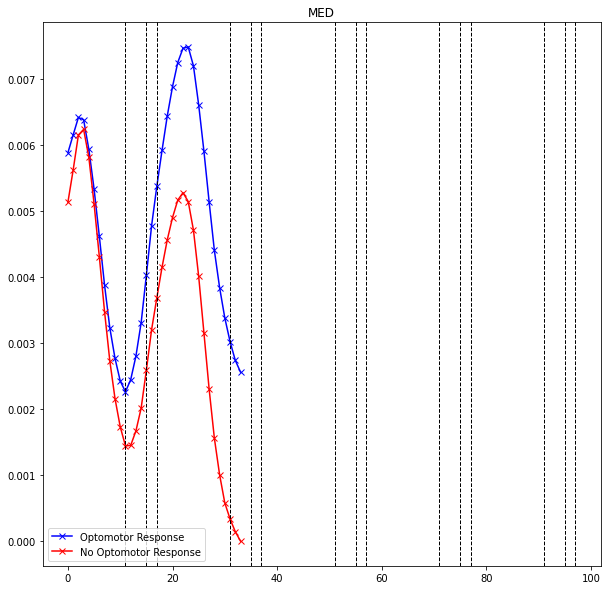

In [16]:
plt.figure(figsize=(10,10))
roi_name = 'MED'
pltnum = np.where(np.asarray(names)==roi_name)[0][0]
signal_type = 'mean'

#fly = 134
for fly in [134]:
    move = roi_signals[fly][signal_type]['right']['ve_0'][pltnum,:]
    plt.plot(move,color='blue',linestyle='-',marker='x',label='Optomotor Response')
    no_move = roi_signals[fly][signal_type]['right']['ve_no_0'][pltnum,:]
    plt.plot(no_move,color='red',linestyle='-',marker='x',label='No Optomotor Response')
    plt.legend()
    plt.title(roi_name)
# move = roi_signal[signal_type]['right']['ve_0'][pltnum,:]
# plt.plot(move,color='blue',linestyle='--',marker='x')
# no_move = roi_signal[signal_type]['right']['ve_no_0'][pltnum,:]
# plt.plot(no_move,color='red',linestyle='--',marker='x')

for line in all_lines:
    plt.axvline(line,linestyle='--',color='k',linewidth=1)

In [17]:
roi_signals[fly]['mean']['left']['ve_0'][:,:].shape

(39, 34)

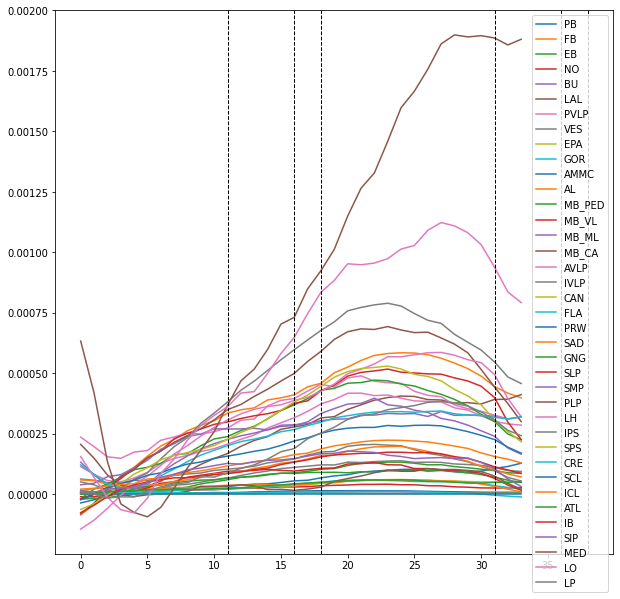

In [30]:
plt.figure(figsize=(10,10))
fly = 134
peak_times = {}
for region in range(38):
    move = roi_signals[fly]['mean']['left']['ve_0'][region,:]
    no_move = roi_signals[fly]['mean']['left']['ve_no_0'][region,:]
    difference = move-no_move
    peak_time = np.argmax(difference)
    peak_times[names[region]] = peak_time
    plt.plot(difference,label=names[region])
vertical_lines = [11,16,18,31,36,38]
for line in vertical_lines:
    plt.axvline(line,linestyle='--',color='k',linewidth=1)
# for line in all_lines:
#     plt.axvline(line,linestyle='--',color='k',linewidth=1)
plt.legend()
#plt.xlim(30,60)

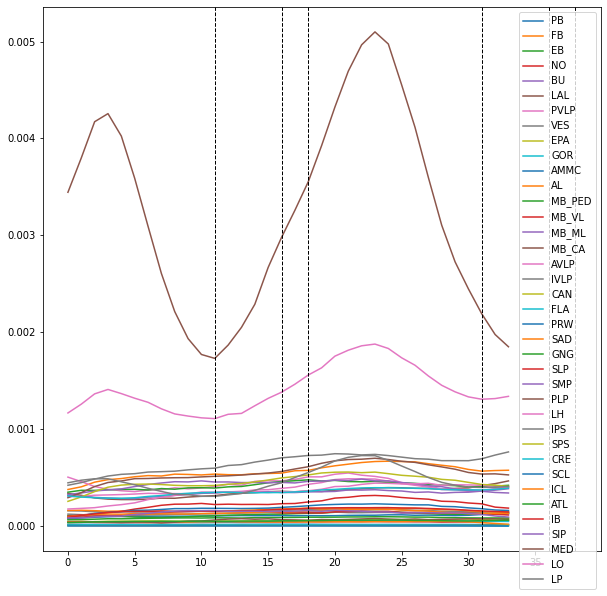

In [31]:
plt.figure(figsize=(10,10))
fly = 134
peak_times = {}
for region in range(38):
    move = roi_signals[fly]['mean']['left']['ve_0'][region,:]
    no_move = roi_signals[fly]['mean']['left']['ve_no_0'][region,:]
    difference = move-no_move
    peak_time = np.argmax(difference)
    peak_times[names[region]] = peak_time
    plt.plot(move,label=names[region])
vertical_lines = [11,16,18,31,36,38]
for line in vertical_lines:
    plt.axvline(line,linestyle='--',color='k',linewidth=1)
# for line in all_lines:
#     plt.axvline(line,linestyle='--',color='k',linewidth=1)
plt.legend()

In [34]:
sorted(peak_times.items(), key=lambda x:x[1], reverse=False)

[('PRW', 0),
 ('CAN', 18),
 ('SIP', 20),
 ('PVLP', 21),
 ('GOR', 21),
 ('AMMC', 21),
 ('AVLP', 21),
 ('MB_VL', 22),
 ('IVLP', 22),
 ('GNG', 22),
 ('SMP', 22),
 ('EB', 23),
 ('NO', 23),
 ('BU', 23),
 ('SLP', 23),
 ('PLP', 23),
 ('IPS', 23),
 ('SPS', 23),
 ('ICL', 23),
 ('IB', 23),
 ('FB', 24),
 ('VES', 24),
 ('EPA', 24),
 ('AL', 24),
 ('FLA', 24),
 ('SAD', 24),
 ('ATL', 24),
 ('MB_CA', 26),
 ('SCL', 26),
 ('MB_PED', 27),
 ('MB_ML', 27),
 ('LH', 27),
 ('CRE', 27),
 ('LO', 27),
 ('LP', 27),
 ('MED', 28),
 ('PB', 33),
 ('LAL', 33)]

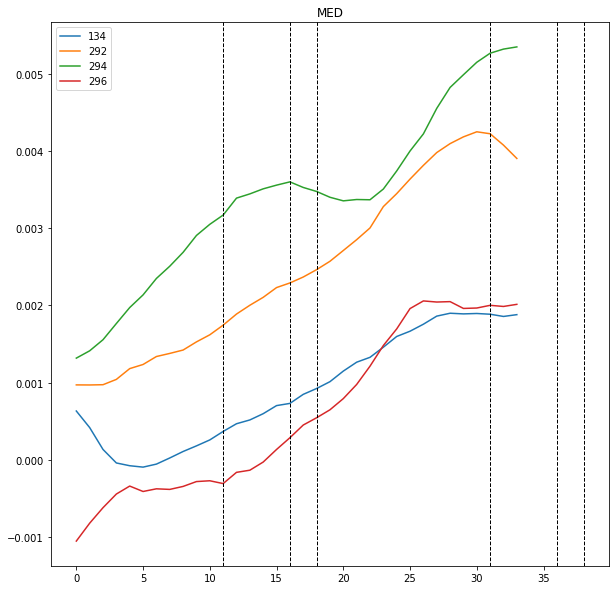

In [39]:
plt.figure(figsize=(10,10))
roi_name = 'MED'
pltnum = np.where(np.asarray(names)==roi_name)[0][0]
signal_type = 'mean'

for fly in flies:
    move = roi_signals[fly][signal_type]['left']['ve_0'][pltnum,:]
    #plt.plot(move,color='blue',linestyle='-',marker='x',label='Optomotor Response')
    no_move = roi_signals[fly][signal_type]['left']['ve_no_0'][pltnum,:]
    #plt.plot(no_move,color='red',linestyle='-',marker='x',label='No Optomotor Response')
    plt.plot(move-no_move,label=fly)
plt.legend()
plt.title(roi_name)
# move = roi_signal[signal_type]['right']['ve_0'][pltnum,:]
# plt.plot(move,color='blue',linestyle='--',marker='x')
# no_move = roi_signal[signal_type]['right']['ve_no_0'][pltnum,:]
# plt.plot(no_move,color='red',linestyle='--',marker='x')
vertical_lines = [11,16,18,31,36,38]
for line in vertical_lines:
    plt.axvline(line,linestyle='--',color='k',linewidth=1)
# for line in all_lines:
#     plt.axvline(line,linestyle='--',color='k',linewidth=1)

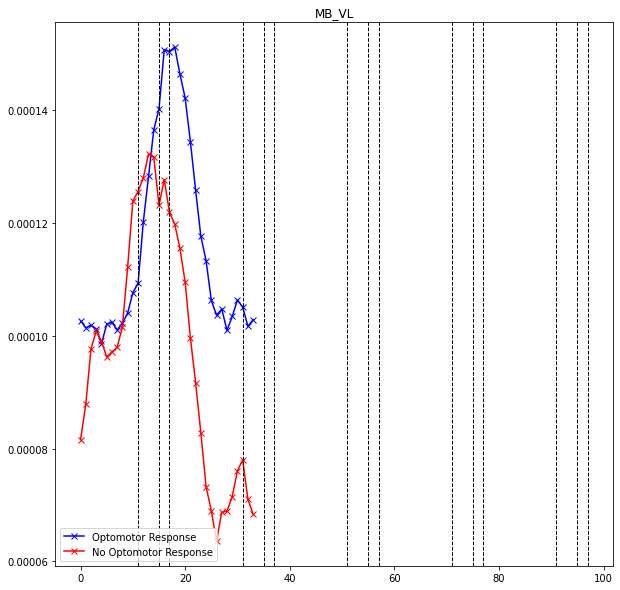

In [40]:
plt.figure(figsize=(10,10))
roi_name = 'MB_VL'
pltnum = np.where(np.asarray(names)==roi_name)[0][0]
signal_type = 'mean'

move = roi_signal[signal_type]['right']['ve_0'][pltnum,:]
plt.plot(move,color='blue',linestyle='-',marker='x',label='Optomotor Response')
no_move = roi_signal[signal_type]['right']['ve_no_0'][pltnum,:]
plt.plot(no_move,color='red',linestyle='-',marker='x',label='No Optomotor Response')
plt.legend()
plt.title(roi_name)
# move = roi_signal[signal_type]['right']['ve_0'][pltnum,:]
# plt.plot(move,color='blue',linestyle='--',marker='x')
# no_move = roi_signal[signal_type]['right']['ve_no_0'][pltnum,:]
# plt.plot(no_move,color='red',linestyle='--',marker='x')

for line in all_lines:
    plt.axvline(line,linestyle='--',color='k',linewidth=1)

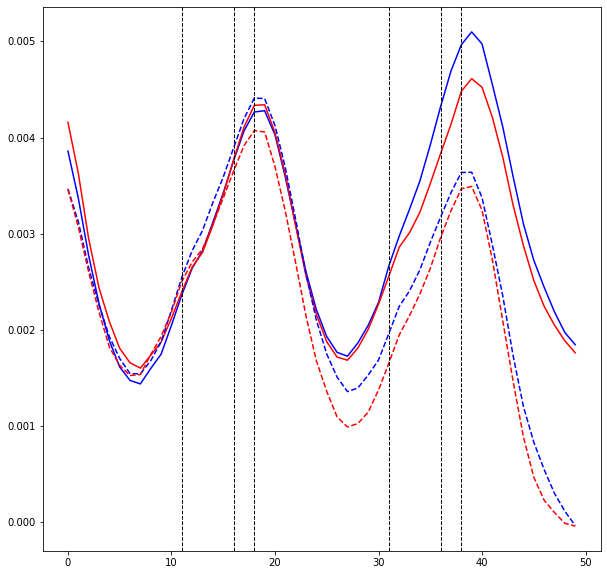

In [27]:
plt.figure(figsize=(10,10))
pltnum = np.where(np.asarray(names)=='MED')[0][0]

plt.plot(roi_signal[signal_type]['left']['ve_0'][pltnum,:],color='blue',linestyle='-')
#plt.plot(roi_signal[signal_type]['right']['ve_0'][pltnum,:],color='blue',linestyle='--')
plt.plot(roi_signal[signal_type]['left']['ve_180'][pltnum,:],color='red',linestyle='-')
#plt.plot(roi_signal[signal_type]['right']['ve_180'][pltnum,:],color='red',linestyle='--')

plt.plot(roi_signal[signal_type]['left']['ve_no_0'][pltnum,:],color='blue',linestyle='--')
#plt.plot(roi_signal[signal_type]['right']['ve_no_0'][pltnum,:],color='grey',linestyle='-')
plt.plot(roi_signal[signal_type]['left']['ve_no_180'][pltnum,:],color='red',linestyle='--')
#plt.plot(roi_signal[signal_type]['right']['ve_no_180'][pltnum,:],color='grey',linestyle='-')
vertical_lines = [11,16,18,31,36,38]
for line in vertical_lines:
    plt.axvline(line,linestyle='--',color='k',linewidth=1)

In [ ]:
plt.figure(figsize=(10,10))
pltnum = np.where(np.asarray(names)=='MED')[0][0]

plt.plot(roi_signal[signal_type]['left']['ve_0'][pltnum,:],color='blue',linestyle='-')
#plt.plot(roi_signal[signal_type]['right']['ve_0'][pltnum,:],color='blue',linestyle='--')
plt.plot(roi_signal[signal_type]['left']['ve_180'][pltnum,:],color='red',linestyle='-')
#plt.plot(roi_signal[signal_type]['right']['ve_180'][pltnum,:],color='red',linestyle='--')

plt.plot(roi_signal[signal_type]['left']['ve_no_0'][pltnum,:],color='blue',linestyle='--')
#plt.plot(roi_signal[signal_type]['right']['ve_no_0'][pltnum,:],color='grey',linestyle='-')
plt.plot(roi_signal[signal_type]['left']['ve_no_180'][pltnum,:],color='red',linestyle='--')
#plt.plot(roi_signal[signal_type]['right']['ve_no_180'][pltnum,:],color='grey',linestyle='-')
vertical_lines = [11,16,18]
for line in vertical_lines:
    ax[i,j].axvline(line,linestyle='-',color='k',linewidth=.5)